# Imports

In [9]:
# Data manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Dimensionality Reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

# Anomaly Detection
from sklearn.ensemble import IsolationForest


# 1. Dataset Analysis

In [10]:
df = pd.read_csv('../data/CC GENERAL.csv')
print(f"\nDataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
df.head()


Dataset shape: (8950, 18)
Columns: ['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [11]:
print("Dataset Information:")
df.info()

print("\nMissing values:")
print(df.isnull().sum())

print("\nBasic statistics:")
df.describe()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null 

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## 1.1 Data Imputation

In [12]:
num_cols = df.select_dtypes(include="number").columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
print(df.isnull().sum())

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


## 1.2 Prepare for Feature Analysis

In [13]:
feature_cols = df.select_dtypes(include="number").columns.tolist() 
if 'CUST_ID' in feature_cols:
    feature_cols.remove('CUST_ID')

X = df[feature_cols].copy()
print(feature_cols)

['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. K-Means

## 2.1 Elbow Method

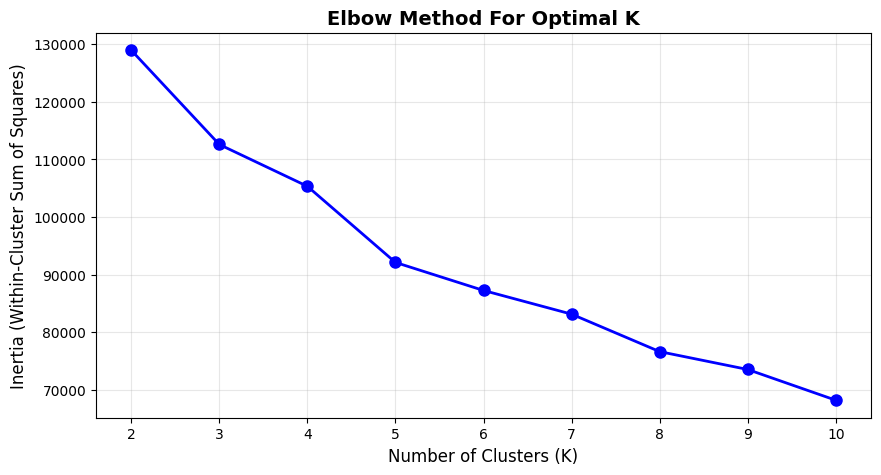

In [15]:
inertia_values = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(K_range, inertia_values, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize=12)
plt.title('Elbow Method For Optimal K', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(K_range)
plt.show()

## 2.2 Silhouette Scores

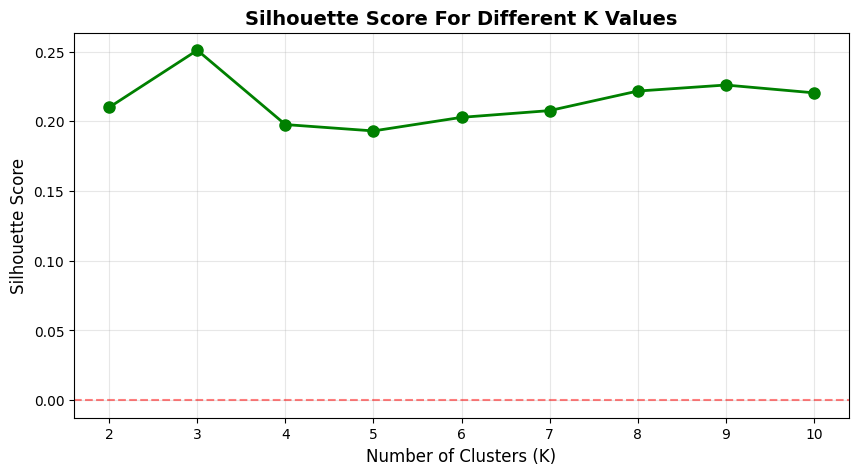


Silhouette Scores:
K=2: 0.210
K=3: 0.251
K=4: 0.198
K=5: 0.193
K=6: 0.203
K=7: 0.208
K=8: 0.222
K=9: 0.226
K=10: 0.220


In [16]:
silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 5))
plt.plot(K_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Silhouette Score For Different K Values', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(K_range)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.5)
plt.show()

print("\nSilhouette Scores:")
for k, score in zip(K_range, silhouette_scores):
    print(f"K={k}: {score:.3f}")

### Optimal K Discussion

We selected K = 3 based on the combined evidence from the elbow plot and silhouette scores. While the elbow curve shows a possible bend around K ≈ 5, the silhouette analysis supports K = 3 as the better choice, since it achieves the highest silhouette score and the scores generally decline after K = 3.

For business interpretability, I’d choose K = 3 as well, because it produces a small number of clear, easy-to-explain customer segments that stakeholders can actually act on. K = 5 can work if you need more granular personas, but it’s harder to communicate and may not add actionable value.

## 2.3 Fitting final K-Means Model

In [17]:
optimal_k = 3

kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_final.fit(X_scaled)

cluster_labels = kmeans_final.labels_

df['Cluster'] = cluster_labels
print(f"\nCluster distribution:")
print(df['Cluster'].value_counts().sort_index())


Cluster distribution:
Cluster
0    1244
1    4557
2    3149
Name: count, dtype: int64


## 2.4 Analyzing Cluster Characteristics

In [18]:
cluster_means = df.groupby('Cluster')[feature_cols].mean()
print("Mean Values by Cluster:")
print(cluster_means)

print("\nCluster Sizes:")
print(df['Cluster'].value_counts().sort_index())

Mean Values by Cluster:
             BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                                  
0        4540.779565           0.968558   577.328730        362.963055   
1         942.285779           0.789345   302.351964        207.644643   
2        1289.083402           0.968448  2185.667964       1239.933881   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                    214.447404   4506.324609             0.285389   
1                     95.005866    529.766557             0.244828   
2                    946.122934    235.275466             0.926621   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster                                                                 
0                          0.136476                          0.186641   
1                          0.091372

## 2.5 Visualize Custers (Heatmap)

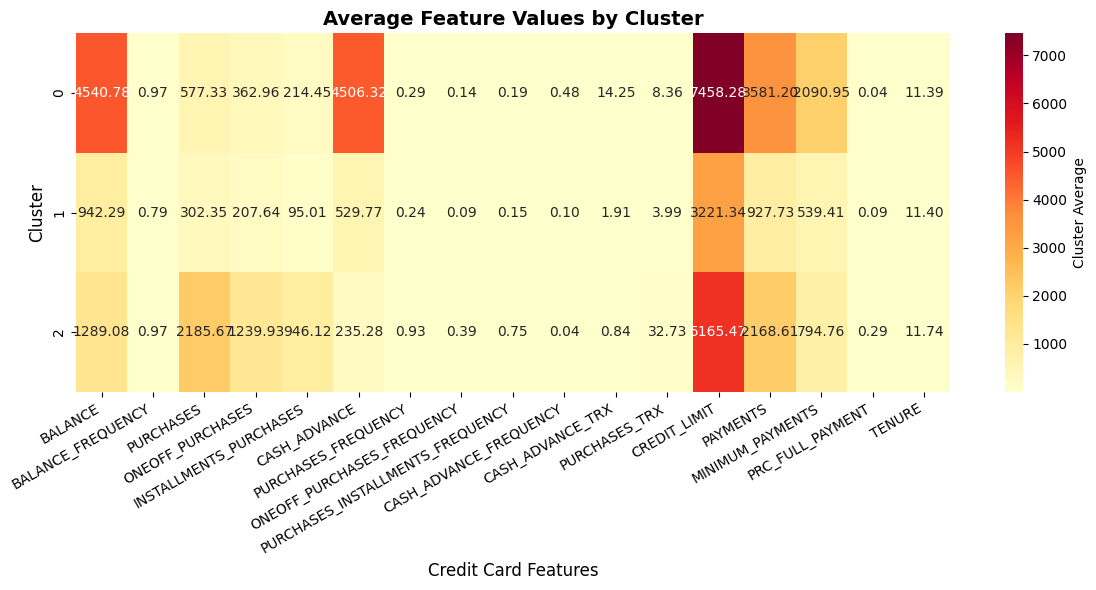

In [19]:
plt.figure(figsize=(12, 6))
ax = sns.heatmap(cluster_means, annot=True, fmt=".2f", cmap="YlOrRd",
                 cbar_kws={"label": "Cluster Average"})
ax.set_title("Average Feature Values by Cluster", fontsize=14, fontweight="bold")
ax.set_ylabel("Cluster", fontsize=12)
ax.set_xlabel("Credit Card Features", fontsize=12)
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

### Clustering Charactersization Discussion

- Cluster 0 (cash withdrawl users): This group carries the highest average balance (≈4,541) and takes very large cash advances (≈4,506) with frequent cash-advance activity (cash-advance frequency ≈0.483 and ≈14.25 cash-advance transactions). They also have the highest credit limits (≈7,458) and minimum payments (≈2,091), but they rarely pay in full (PRC_FULL_PAYMENT ≈0.037), suggesting heavy cash-advance behavior.
- Cluster 1 (basic users): This is the largest segment and shows the lowest overall card usage, with low balances (≈942), low purchases (≈302), and few purchase transactions (≈3.99). They have the lowest credit limits (≈3,221) and relatively small payments (≈928), consistent with light, occasional usage and lower customer value.
- Cluster 2 (high-spend, active purchasers): This group is the most purchase-driven, with the highest total purchases (≈2,186) supported by both one-off (≈1,240) and installment purchases (≈946), and very high activity (purchase frequency ≈0.927 and ≈32.73 purchase transactions). Their cash-advance usage is minimal (cash-advance ≈235; cash-advance frequency ≈0.043), and they have the highest tendency to pay in full (PRC_FULL_PAYMENT ≈0.288), indicating engaged, higher-value shoppers.

# 3. Dimensionality Reduction

## 3.1 PCA

In [20]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled) 

print(f"PCA result shape: {X_pca.shape}")
print(f"\nExplained variance ratio:")
print(f"PC1: {pca.explained_variance_ratio_[0]:.3f}")
print(f"PC2: {pca.explained_variance_ratio_[1]:.3f}")
print(f"Total variance explained: {pca.explained_variance_ratio_.sum():.3f}")

PCA result shape: (8950, 2)

Explained variance ratio:
PC1: 0.273
PC2: 0.203
Total variance explained: 0.476


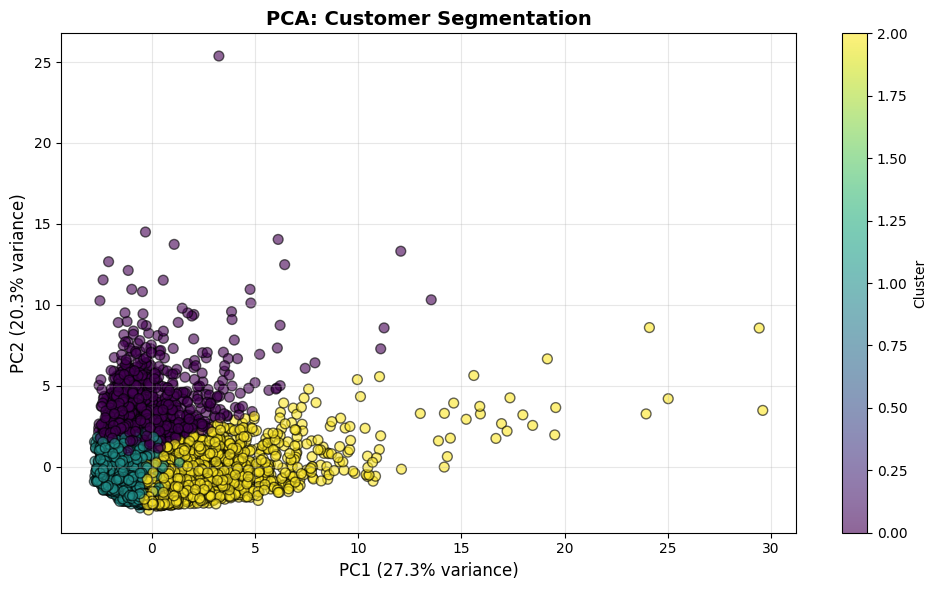

In [21]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels,
                     cmap='viridis', alpha=0.6, edgecolors='k', s=50)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)', fontsize=12)
plt.title('PCA: Customer Segmentation', fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Cluster')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 3.2 t-SNE

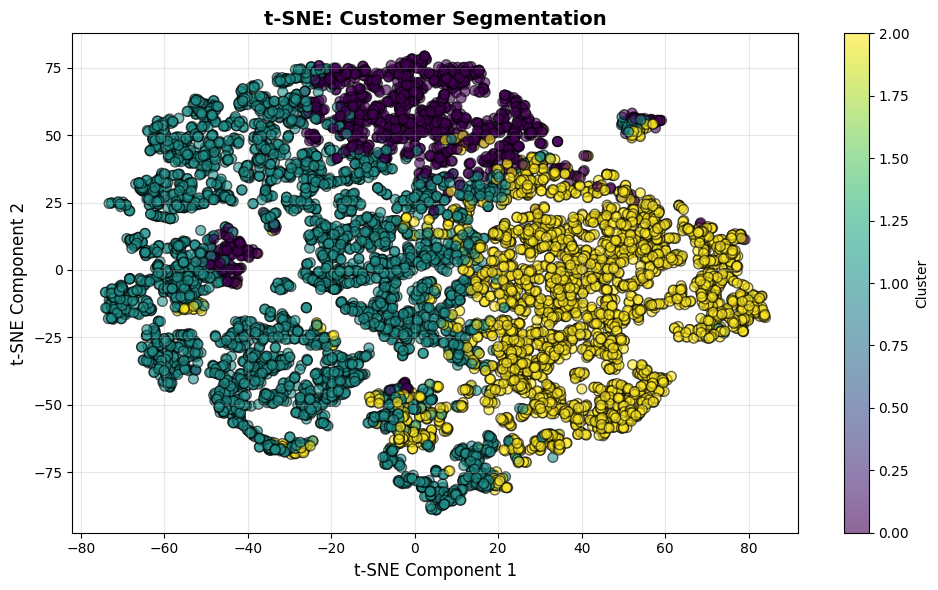

In [22]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels,
                     cmap='viridis', alpha=0.6, edgecolors='k', s=50)
plt.xlabel('t-SNE Component 1', fontsize=12)
plt.ylabel('t-SNE Component 2', fontsize=12)
plt.title('t-SNE: Customer Segmentation', fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Cluster')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 2.3 Side by side comparison

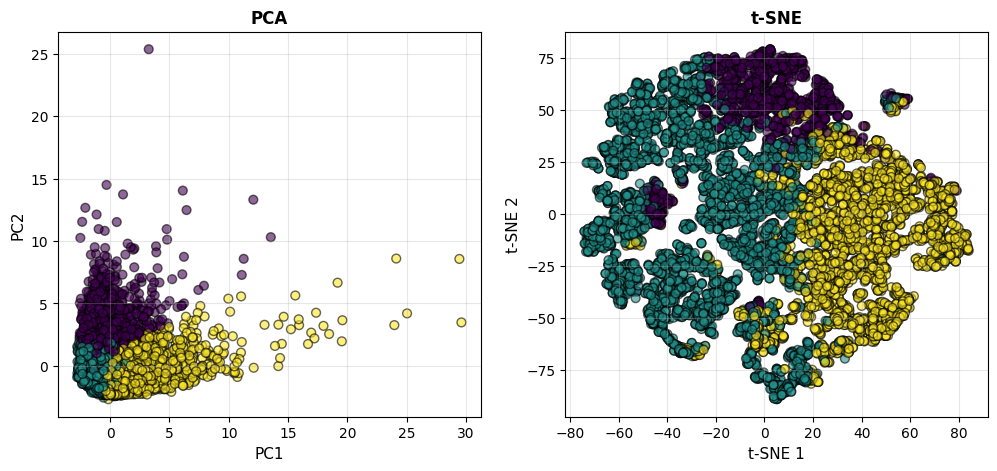

In [24]:
n_plots = 2
fig, axes = plt.subplots(1, n_plots, figsize=(6*n_plots, 5))

if n_plots == 2:
    axes = [axes[0], axes[1]]

# PCA plot
scatter1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels,
                          cmap='viridis', alpha=0.6, edgecolors='k', s=40)
axes[0].set_xlabel('PC1', fontsize=11)
axes[0].set_ylabel('PC2', fontsize=11)
axes[0].set_title('PCA', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# t-SNE plot
scatter2 = axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels,
                          cmap='viridis', alpha=0.6, edgecolors='k', s=40)
axes[1].set_xlabel('t-SNE 1', fontsize=11)
axes[1].set_ylabel('t-SNE 2', fontsize=11)
axes[1].set_title('t-SNE', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

### Dimensionality Reduction Discussion

The data appears to have non-linear structure: the linear PCA projection still shows substantial overlap between clusters, whereas the non-linear t-SNE embedding produces much clearer visual separation. This suggests the customer behaviors distinguishing the groups rely on relationships that PCA can’t fully capture in 2D. For business executives, I would present PCA as the primary view because it’s more interpretable (e.g., explained variance), and use t-SNE as supporting evidence to illustrate the stronger separation.

# Part 3: Anamoly Detection

In [ ]:
# Isolation Forest using 0.1 as an example contamination rate
iso_forest = IsolationForest(contamination=0.1, random_state=42)

anomaly_labels = iso_forest.fit_predict(X_scaled)

# Add anomaly labels to dataframe
df['Anomaly'] = anomaly_labels

# Count anomalies
n_anomalies = (anomaly_labels == -1).sum()
n_normal = (anomaly_labels == 1).sum()

print(f"✓ Anomaly detection completed!")
print(f"\nResults:")
print(f"Normal customers: {n_normal} ({n_normal/len(df)*100:.1f}%)")
print(f"Anomalies detected: {n_anomalies} ({n_anomalies/len(df)*100:.1f}%)")

✓ Anomaly detection completed!

Results:
Normal customers: 8055 (90.0%)
Anomalies detected: 895 (10.0%)


In [26]:
# Try different contamination values
contamination_values = [0.03, 0.05, 0.10]

print("Testing different contamination values:\n")

for cont in contamination_values:
    iso_forest = IsolationForest(contamination=cont, random_state=42)
    anomaly_labels = iso_forest.fit_predict(X_scaled)

    n_anomalies = (anomaly_labels == -1).sum()
    n_normal = (anomaly_labels == 1).sum()

    print(f"Contamination={cont}")
    print(f"  Normal customers: {n_normal} ({n_normal/len(df)*100:.1f}%)")
    print(f"  Anomalies detected: {n_anomalies} ({n_anomalies/len(df)*100:.1f}%)\n")

Testing different contamination values:

Contamination=0.03
  Normal customers: 8681 (97.0%)
  Anomalies detected: 269 (3.0%)

Contamination=0.05
  Normal customers: 8502 (95.0%)
  Anomalies detected: 448 (5.0%)

Contamination=0.1
  Normal customers: 8055 (90.0%)
  Anomalies detected: 895 (10.0%)



We selected a contamination value of 0.05 for the final anomaly detection model.

At 3% contamination, only 269 customers were flagged as anomalous, which risked missing meaningful but rare extreme behaviors.

At 10% contamination, nearly one in ten customers was classified as anomalous, which likely over-flags normal behavior and reduces interpretability.

The 5% contamination level provides a balanced trade-off, identifying a manageable number of customers with clearly unusual spending patterns while avoiding excessive false positives.

Visual inspection using PCA and t-SNE further confirmed that anomalies detected at 5% tend to lie at the edges of the feature space, supporting their interpretation as genuinely unusual cases

In [27]:
final_contamination = 0.05

iso_forest = IsolationForest(
    contamination=final_contamination,
    random_state=42
)

anomaly_labels = iso_forest.fit_predict(X_scaled)

df['Anomaly'] = anomaly_labels

print("✓ Final anomaly detection completed!")
print(f"Using contamination = {final_contamination}")
print(f"Anomalies detected: {(anomaly_labels == -1).sum()}")

✓ Final anomaly detection completed!
Using contamination = 0.05
Anomalies detected: 448


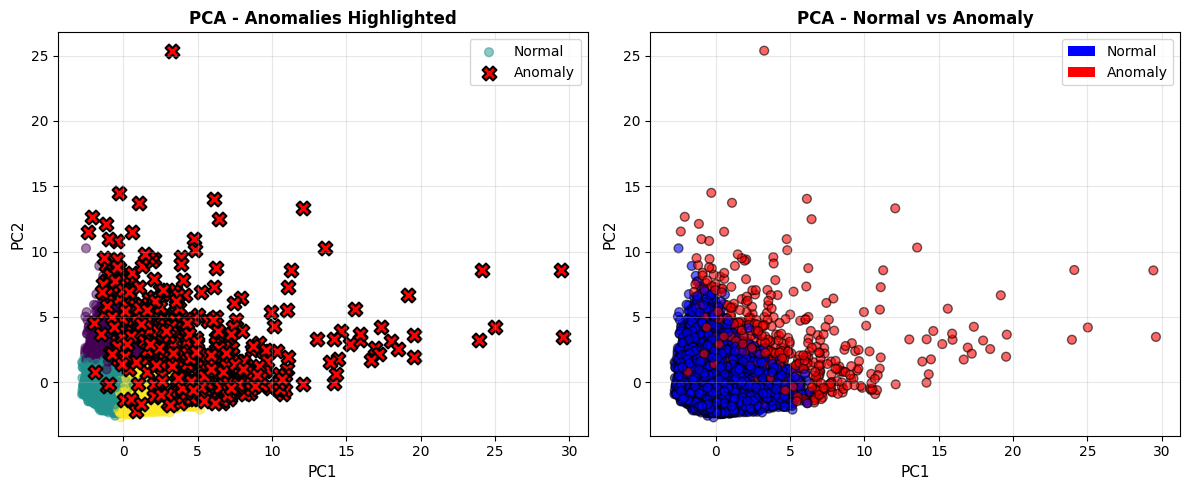

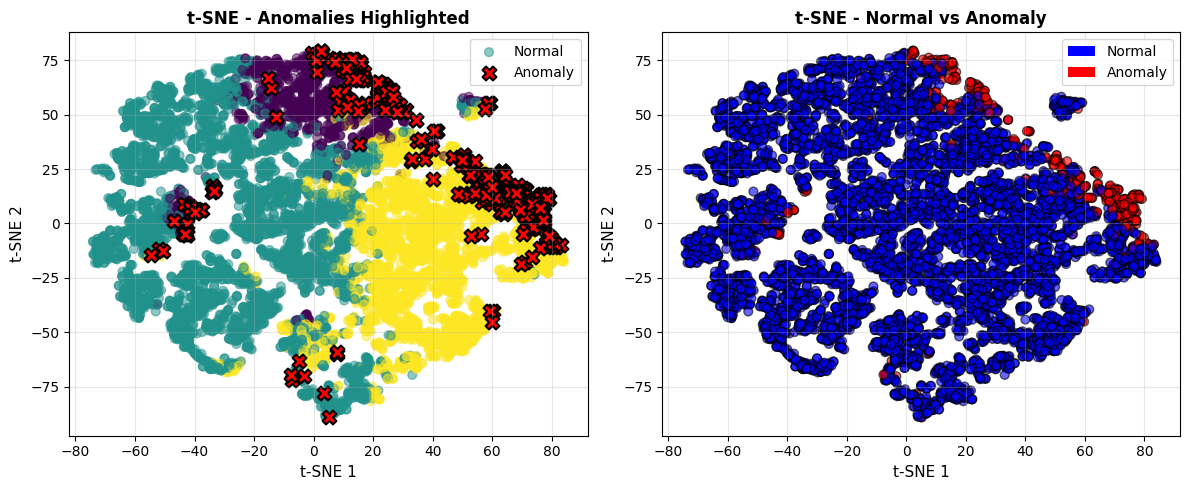

In [28]:
# Visualization helper function 
cluster_labels = df['Cluster'].values

def plot_anomalies(X_reduced, anomaly_labels, cluster_labels, title, xlabel, ylabel):
    """
    Plot dimensionality reduction with anomalies highlighted.
    """
    plt.figure(figsize=(12, 5))

    # Plot 1: Colored by clusters, anomalies marked with X
    plt.subplot(1, 2, 1)
    normal_mask = anomaly_labels == 1
    anomaly_mask = anomaly_labels == -1

    plt.scatter(X_reduced[normal_mask, 0], X_reduced[normal_mask, 1],
               c=cluster_labels[normal_mask], cmap='viridis',
               alpha=0.5, s=40, label='Normal')
    plt.scatter(X_reduced[anomaly_mask, 0], X_reduced[anomaly_mask, 1],
               c='red', marker='X', s=100, edgecolors='black',
               linewidths=1.5, label='Anomaly')
    plt.xlabel(xlabel, fontsize=11)
    plt.ylabel(ylabel, fontsize=11)
    plt.title(f'{title} - Anomalies Highlighted', fontsize=12, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Plot 2: Just anomaly status
    plt.subplot(1, 2, 2)
    colors = ['blue' if x == 1 else 'red' for x in anomaly_labels]
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1],
               c=colors, alpha=0.6, s=40, edgecolors='k')
    plt.xlabel(xlabel, fontsize=11)
    plt.ylabel(ylabel, fontsize=11)
    plt.title(f'{title} - Normal vs Anomaly', fontsize=12, fontweight='bold')

    # Custom legend
    from matplotlib.patches import Patch
    legend_elements = [Patch(facecolor='blue', label='Normal'),
                      Patch(facecolor='red', label='Anomaly')]
    plt.legend(handles=legend_elements)
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# Visualize on PCA
plot_anomalies(X_pca, anomaly_labels, cluster_labels, 'PCA', 'PC1', 'PC2')

# Visualize on t-SNE
plot_anomalies(X_tsne, anomaly_labels, cluster_labels, 't-SNE', 't-SNE 1', 't-SNE 2')

In [29]:
# Compare spending patterns of anomalies vs normal customers

spending_features = [
    'BALANCE',
    'PURCHASES',
    'ONEOFF_PURCHASES',
    'INSTALLMENTS_PURCHASES',
    'CASH_ADVANCE',
    'PURCHASES_FREQUENCY',
    'CASH_ADVANCE_FREQUENCY',
    'CREDIT_LIMIT'
]

normal_customers = df[df['Anomaly'] == 1]
anomaly_customers = df[df['Anomaly'] == -1]

# Calculate mean spending values
normal_means = normal_customers[spending_features].mean()
anomaly_means = anomaly_customers[spending_features].mean()

# Create comparison dataframe
comparison = pd.DataFrame({
    'Normal Customers': normal_means,
    'Anomalous Customers': anomaly_means,
    'Difference': anomaly_means - normal_means
})

print("Spending Comparison: Normal vs Anomalous Customers")
display(comparison.round(2))

Spending Comparison: Normal vs Anomalous Customers


,Normal Customers,Anomalous Customers,Difference
BALANCE,1403.71,4615.50,3211.79
PURCHASES,734.64,6099.86,5365.21
ONEOFF_PURCHASES,407.09,4109.90,3702.81
INSTALLMENTS_PURCHASES,327.80,1991.35,1663.55
CASH_ADVANCE,826.93,3862.32,3035.39
PURCHASES_FREQUENCY,0.47,0.80,0.32
CASH_ADVANCE_FREQUENCY,0.13,0.29,0.17
CREDIT_LIMIT,4198.96,10098.82,5899.86


The anomalous customers are characterized by extremely high financial activity compared to normal customers. They have substantially larger balances, purchases (especially one-off purchases), cash advances, and credit limits. For example, anomalous customers spend over 8× more on purchases and hold more than double the balance on average. These behaviors place them far outside the typical spending and credit usage patterns of the majority of customers, making them statistically rare.

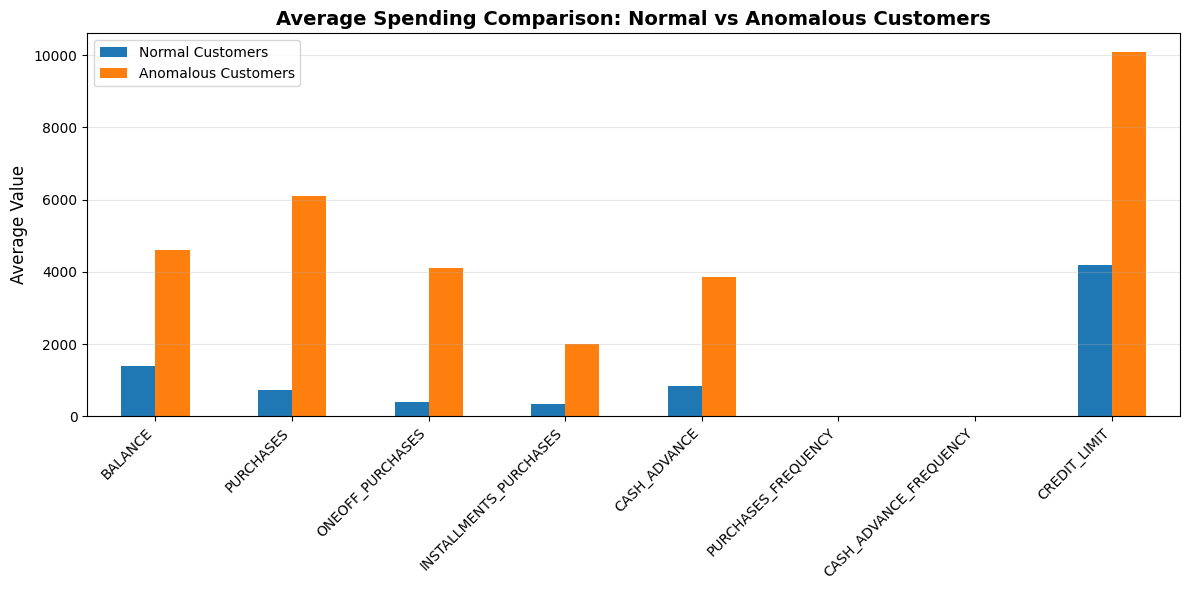

In [30]:
comparison[['Normal Customers', 'Anomalous Customers']].plot(
    kind='bar',
    figsize=(12, 6)
)

plt.title(
    'Average Spending Comparison: Normal vs Anomalous Customers',
    fontsize=14,
    fontweight='bold'
)
plt.ylabel('Average Value', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

In [32]:
# Look at a few anomalous customers

feature_cols = [
    'BALANCE',
    'PURCHASES',
    'CASH_ADVANCE',
    'CREDIT_LIMIT'
]

anomaly_customers = df[df['Anomaly'] == -1]

print("Sample of Anomalous Customers:")
display(
    anomaly_customers[feature_cols + ['Cluster']]
    .head(10)
)

Sample of Anomalous Customers:


,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,Cluster
6,627.260806,7091.01,0.000000,13500.0,2
21,6369.531318,6359.95,229.028245,11250.0,2
23,3800.151377,4248.35,7974.415626,9000.0,0
30,12136.219960,3038.01,3183.583301,13000.0,0
39,1411.602230,963.24,6173.682877,7500.0,0
50,4931.331857,901.42,8530.648614,12000.0,0
71,2990.422186,4523.27,27296.485760,7000.0,0
86,7069.950386,1603.78,5626.004046,11000.0,0
87,8181.251131,2258.01,5251.228934,13500.0,0
90,9381.255094,5100.07,370.737197,9000.0,2


The anomalies can be grouped into a few meaningful types:

- VIP / High-Value Customers: Customers with very high credit limits and heavy purchase volumes, likely representing premium or elite cardholders.

- High Cash-Advance Users: Customers with unusually large cash advances and high cash-advance frequency, which may indicate risky financial behavior.

- Mixed Extreme Users: Customers who simultaneously exhibit high purchases, high balances, and high cash advances, representing unique and complex usage patterns rather than errors.
Overall, these anomalies are not data errors but legitimate customers with extreme yet meaningful behaviors.

Anomaly Rate by Cluster:
Cluster
0    0.147106
1    0.001756
2    0.081613
Name: count, dtype: float64


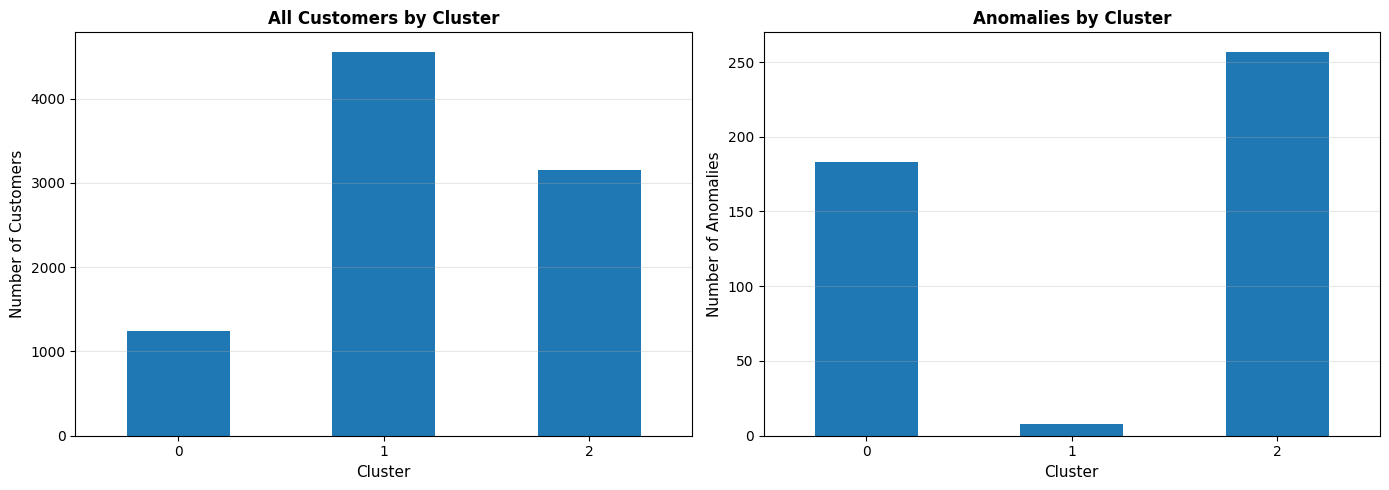

In [33]:
# Calculate anomaly rate per cluster
cluster_counts = df['Cluster'].value_counts().sort_index()
anomaly_counts = anomaly_customers['Cluster'].value_counts().sort_index()

anomaly_rate = (anomaly_counts / cluster_counts).fillna(0)

print("Anomaly Rate by Cluster:")
print(anomaly_rate)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# All customers by cluster
df['Cluster'].value_counts().sort_index().plot(
    kind='bar',
    ax=axes[0]
)
axes[0].set_title('All Customers by Cluster', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Cluster', fontsize=11)
axes[0].set_ylabel('Number of Customers', fontsize=11)
axes[0].tick_params(axis='x', rotation=0)
axes[0].grid(True, alpha=0.3, axis='y')

# Anomalies by cluster
anomaly_customers['Cluster'].value_counts().sort_index().plot(
    kind='bar',
    ax=axes[1]
)
axes[1].set_title('Anomalies by Cluster', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Cluster', fontsize=11)    
axes[1].set_ylabel('Number of Anomalies', fontsize=11)
axes[1].tick_params(axis='x', rotation=0)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

Anomalies are not evenly distributed across clusters.

- Cluster 0 contains the highest anomaly rate (~14.7%), suggesting it represents high-activity or high-risk customers.

- Cluster 2 has a moderate anomaly rate (~8.2%), indicating a smaller but still notable presence of extreme behavior.

- Cluster 1 shows almost no anomalies (~0.18%), implying it represents stable, low-variance customers.
This indicates that anomaly detection aligns well with clustering results and that certain customer segments are far more prone to anomalous behavior.

## Anomaly Critical Analysis

Anamalous Cases
- **Customer 6 [Cluster 2]:** Purchases: 7,091, Cash Advance: 0, Credit Limit: 13,500 - This customer spends far more than average but does not rely on cash advances, which is atypical among normal users. Their spending is well supported by a high credit limit, likely a VIP customer with strong purchasing power
- **Customer 21 [Cluster 2]:** Balance: 6,369, Purchases: 6,360, Cash Advance: 229, Credit Limit: 11,250
- **Customer 39 [Cluster 1]:** Very high Fresh (56,159) and Frozen (10,002) spending, but unusually low spending in other categories like Milk and Grocery.

Anomaly Groups and Business Action
- Type 1: [VIP / High-Value Cardholders]

These anomalies represent customers with exceptionally high balances, total purchases, and credit limits across multiple spending dimensions. For example, customers such as 23 and 90 show very high BALANCE, PURCHASES, and CREDIT_LIMIT values compared to the average customer. Their spending frequency is also higher than normal, indicating consistent and intensive card usage rather than isolated events.

Business Action:
These customers should be prioritized for premium credit card offerings, personalized rewards, higher cashback or points multipliers, and proactive retention strategies. Increasing credit limits or offering exclusive financial products may further strengthen long-term customer value.

- Type 2: [Cash-Advance–Heavy or Category-Skewed Users]

This group includes customers with extreme values in specific credit behaviors, particularly unusually high CASH_ADVANCE usage relative to purchases (e.g., Customers 71 and 50). Their profiles suggest reliance on cash advances rather than regular purchase transactions, which is atypical for most cardholders and strongly deviates from the population norm.

Business Action:
These customers may require risk monitoring and financial guidance, such as education on cash advance fees and interest, or alternative credit products. From a business perspective, this group may also signal higher credit risk, warranting closer monitoring rather than aggressive promotional incentives.

- Type 3: [Irregular or One-Time High Spenders]

These anomalies display sharp imbalances between spending amount and frequency, such as very high ONEOFF_PURCHASES combined with low PURCHASES_FREQUENCY (e.g., Customer 30). Such patterns indicate sporadic large transactions rather than consistent spending behavior, which sets them apart from both typical users and VIP customers.

Business Action:
These customers should be monitored over time to determine whether the behavior is temporary or persistent. If repeated, they may be candidates for targeted offers tied to large purchases; otherwise, the anomaly may reflect a one-time event and should not drive immediate business decisions.

The majority of detected anomalies appear to be “good” anomalies (high-value or behaviorally distinct customers), while a smaller subset reflects potentially risky or irregular usage patterns rather than data errors. Isolation Forest effectively highlights customers whose credit behavior meaningfully deviates from the norm, providing actionable insights for both marketing and risk management teams.

# Part 4: Integrated Analysis

## How the Three Techniques Worked Together

This analysis combined K-means clustering, dimensionality reduction (PCA and t-SNE), and anomaly detection (Isolation Forest) to provide both a macro-level segmentation of credit card customers and a micro-level identification of exceptional behavior.

K-means clustering established clear customer segments based on spending behavior, balances, cash advance usage, and credit limits. Dimensionality reduction techniques were then used to validate and interpret these clusters visually, while anomaly detection identified customers whose behavior deviated significantly from both the overall population and their assigned clusters.

Together, these techniques revealed not only who the customer segments are, but also which customers within those segments deserve special attention.

## Did Dimensionality Reduction Confirm the Clustering?

Yes, dimensionality reduction largely confirmed the clustering structure.

PCA showed moderate separation between clusters along the first two principal components, indicating that much of the variance in the data is driven by linear combinations of spending intensity and credit capacity (e.g., PURCHASES, BALANCE, CREDIT_LIMIT). Some overlap remained, which is expected given correlated financial behaviors.

t-SNE, which captures non-linear structure, revealed clearer local separation, particularly distinguishing the low-activity cluster from high-spending and cash-advance-heavy clusters. This suggests that while the data contains some linear structure, non-linear relationships play an important role in customer behavior.

Overall, t-SNE reinforced the validity of the chosen clustering while highlighting subtle behavioral differences not immediately visible in PCA.

## Do Anomalies Align with Specific Clusters or Cut Across Them?

Anomalies are not evenly distributed across clusters.

Cluster 0 contains the highest concentration of anomalies, with an anomaly rate of approximately 14.7%. This cluster represents customers with high balances, purchases, and cash advances, making it more likely to contain extreme behaviors.

Cluster 2 shows a moderate anomaly rate (~8.2%), indicating the presence of unusually high spenders or irregular users within an otherwise active segment.

Cluster 1 has almost no anomalies (~0.2%), suggesting it represents stable, low-risk, and behaviorally consistent customers.

This pattern indicates that anomalies are cluster-dependent, with high-activity clusters naturally producing more extreme cases. Rather than cutting across all segments uniformly, anomalies tend to emerge within already high-intensity usage groups.

## Cohesive Business Recommendations Based on All Findings

Integrating clustering, dimensionality reduction, and anomaly detection leads to several actionable business insights:

Segment-Specific Strategies

Cluster 1 (Low Activity / Stable Users): Maintain with low-cost engagement and automated retention strategies.

Cluster 2 (Active Transactors): Offer tailored rewards to encourage consistent spending while monitoring emerging anomalies.

Cluster 0 (High Usage / High Risk & Value): Apply differentiated treatment, as this cluster contains both valuable VIPs and potentially risky users.

Targeted Anomaly Actions

VIP anomalies should receive premium services and loyalty incentives.

Cash-advance-heavy anomalies warrant closer risk monitoring and financial education.

Irregular high spenders should be observed over time before taking decisive action.

Executive Insight
Clustering defines who the customers are, dimensionality reduction confirms why the segments make sense, and anomaly detection highlights which individual customers matter most. Together, these techniques enable precision decision-making, balancing growth opportunities with risk management.

## Final Takeaway

The integrated approach demonstrates that customer segmentation alone is insufficient without anomaly detection, and anomaly detection is far more meaningful when grounded in well-defined clusters. By combining all three techniques, this analysis provides a scalable, interpretable, and business-ready framework for managing credit card customers effectively.